# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [596]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [597]:
df_train = pd.read_csv('data/loan_train.csv')
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [598]:
df_train.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [599]:
df_test = pd.read_csv('data/loan_test.csv')
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [600]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Train dataset

In [601]:
df_train_cat = df_train[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']]

In [602]:
df_train_num = df_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

### Test dataset

In [603]:
df_test_cat = df_test[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']]

In [604]:
df_test_num = df_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]

In [605]:
def heatmap_plot(df):
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

## Filling missing value for categorical features

In [606]:
def get_nan_column(df):
    nan_list = []

    nan_column_dict = df.isna().sum().to_dict()
    
    for key, val in nan_column_dict.items():
        if val != 0:
            nan_list.append(key)

    return nan_list

In [607]:
def occurance_fill(df):
    nan_list = get_nan_column(df)

    for col in nan_list:
        val_count_dict = df_train_cat[col].value_counts().to_dict()

        df[col].fillna(next(iter(val_count_dict.items()))[0], inplace=True)

### Training dataset

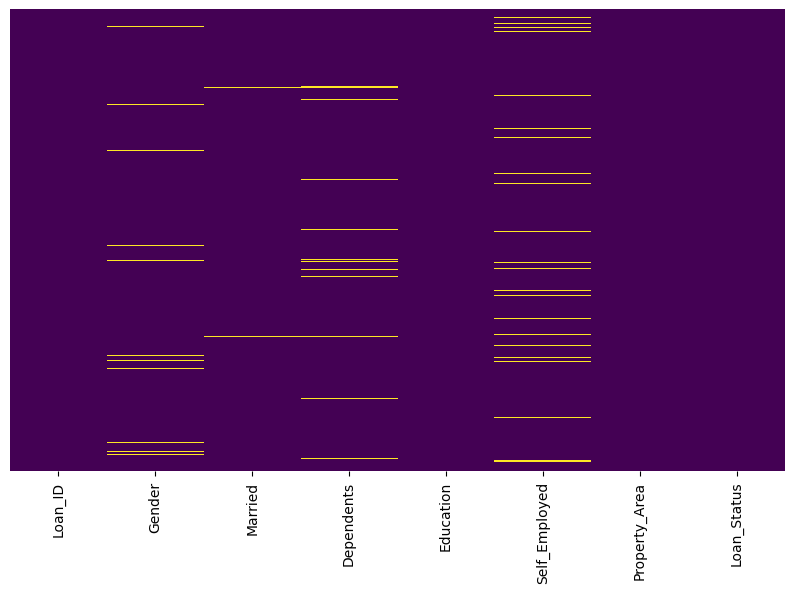

In [608]:
heatmap_plot(df_train_cat)

C:\Users\derri\AppData\Local\Temp\ipykernel_33960\3797116691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(next(iter(val_count_dict.items()))[0], inplace=True)
C:\Users\derri\AppData\Local\Temp\ipykernel_33960\3797116691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(next(iter(val_count_dict.items()))[0], inplace=True)
C:\Users\derri\AppData\Local\Temp\ipykernel_33960\3797116691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

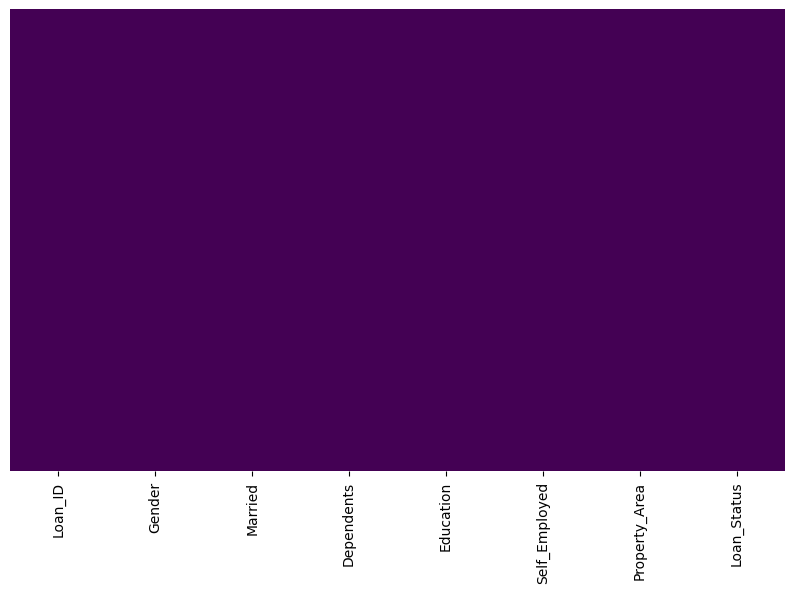

In [609]:
occurance_fill(df_train_cat)
heatmap_plot(df_train_cat)

### Test dataset

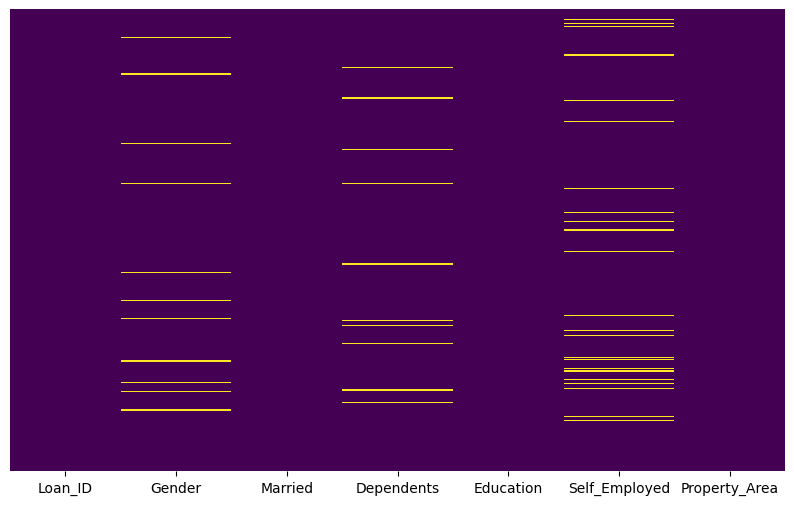

In [610]:
heatmap_plot(df_test_cat)

C:\Users\derri\AppData\Local\Temp\ipykernel_33960\3797116691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(next(iter(val_count_dict.items()))[0], inplace=True)
C:\Users\derri\AppData\Local\Temp\ipykernel_33960\3797116691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(next(iter(val_count_dict.items()))[0], inplace=True)
C:\Users\derri\AppData\Local\Temp\ipykernel_33960\3797116691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

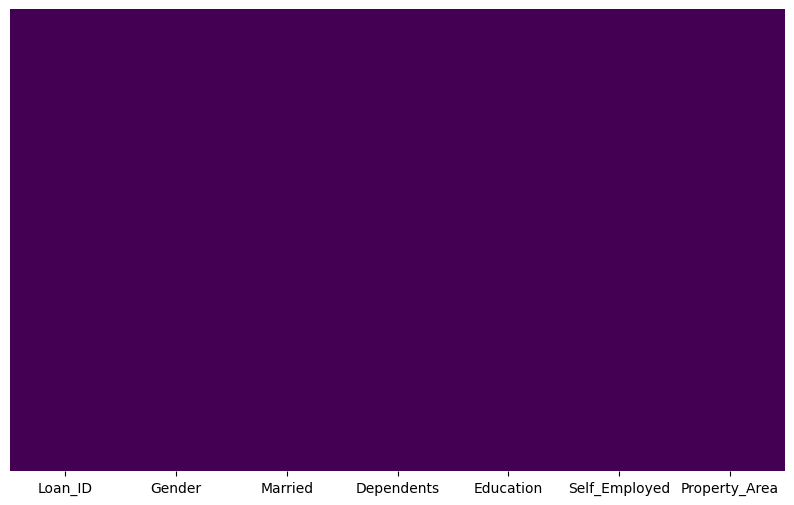

In [611]:
occurance_fill(df_test_cat)
heatmap_plot(df_test_cat)

## Impute missing value for numberical features

In [612]:
from sklearn.impute import SimpleImputer

In [613]:
imputer = SimpleImputer(strategy='mean')

### Train dataset

In [614]:
imputer.fit(df_train_num)

df_transform = imputer.transform(df_train_num)
df_train_num = pd.DataFrame(data=df_transform)
df_train_num.columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
    'Loan_Amount_Term', 'Credit_History']

df_train_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,180.0,1.0
611,8072.0,240.0,253.000000,360.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0


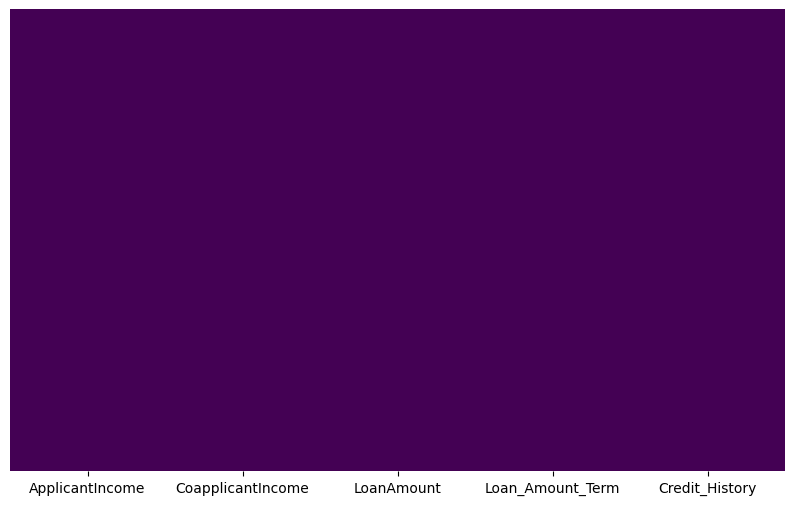

In [615]:
heatmap_plot(df_train_num)

### Test dataset

In [616]:
imputer.fit(df_test_num)

df_transform = imputer.transform(df_test_num)
df_test_num = pd.DataFrame(data=df_transform)
df_test_num.columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
    'Loan_Amount_Term', 'Credit_History']

df_test_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5720.0,0.0,110.0,360.0,1.000000
1,3076.0,1500.0,126.0,360.0,1.000000
2,5000.0,1800.0,208.0,360.0,1.000000
3,2340.0,2546.0,100.0,360.0,0.825444
4,3276.0,0.0,78.0,360.0,1.000000
...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.000000
363,4158.0,709.0,115.0,360.0,1.000000
364,3250.0,1993.0,126.0,360.0,0.825444
365,5000.0,2393.0,158.0,360.0,1.000000


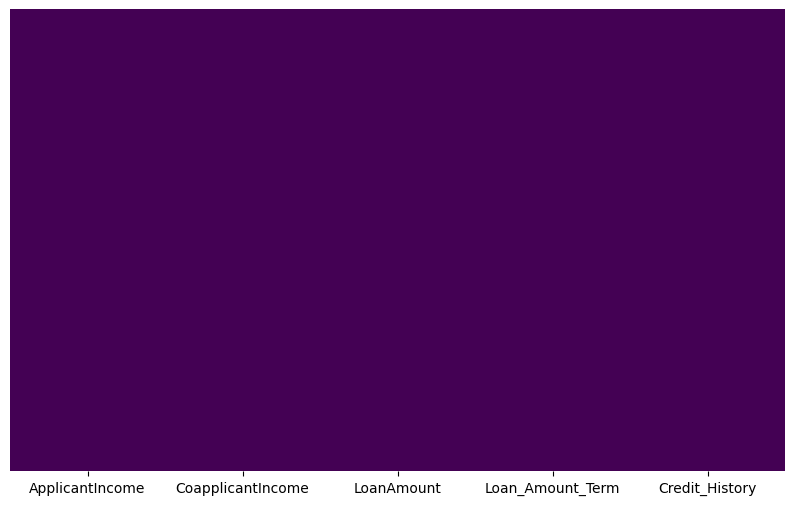

In [617]:
heatmap_plot(df_test_num)

### Encode object features

In [618]:
from sklearn.preprocessing import LabelEncoder

In [619]:
label_encoder = LabelEncoder()

In [620]:
def clean_dep(x):
    return x[0]

In [621]:
df_train_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [622]:
df_train_cat.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [623]:

df_train_cat['Property_Area']= label_encoder.fit_transform(df_train_cat['Property_Area'])
df_train_cat['Gender']= label_encoder.fit_transform(df_train_cat['Gender'])
df_train_cat['Education']= label_encoder.fit_transform(df_train_cat['Education']) 
df_train_cat['Self_Employed']= label_encoder.fit_transform(df_train_cat['Self_Employed'])
df_train_cat['Married']= label_encoder.fit_transform(df_train_cat['Married'])
df_train_cat['Dependents'] = df_train_cat['Dependents'].apply(clean_dep)
df_train_cat['Dependents']= label_encoder.fit_transform(df_train_cat['Dependents'])
df_train_cat['Loan_Status']= label_encoder.fit_transform(df_train_cat['Loan_Status'])
df_train_cat

C:\Users\derri\AppData\Local\Temp\ipykernel_33960\1035418125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cat['Property_Area']= label_encoder.fit_transform(df_train_cat['Property_Area'])
C:\Users\derri\AppData\Local\Temp\ipykernel_33960\1035418125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cat['Gender']= label_encoder.fit_transform(df_train_cat['Gender'])
C:\Users\derri\AppData\Local\Temp\ipykernel_33960\1035418125.py:3: SettingWithCopyWarning: 
A value is trying to be set 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,2,1
1,LP001003,1,1,1,0,0,0,0
2,LP001005,1,1,0,0,1,2,1
3,LP001006,1,1,0,1,0,2,1
4,LP001008,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,0,1
610,LP002979,1,1,3,0,0,0,1
611,LP002983,1,1,1,0,0,2,1
612,LP002984,1,1,2,0,0,2,1


In [624]:

df_test_cat['Property_Area']= label_encoder.fit_transform(df_test_cat['Property_Area'])
df_test_cat['Gender']= label_encoder.fit_transform(df_test_cat['Gender'])
df_test_cat['Education']= label_encoder.fit_transform(df_test_cat['Education']) 
df_test_cat['Self_Employed']= label_encoder.fit_transform(df_test_cat['Self_Employed'])
df_test_cat['Married']= label_encoder.fit_transform(df_test_cat['Married'])
df_test_cat['Dependents'] = df_test_cat['Dependents'].apply(clean_dep)
df_test_cat['Dependents']= label_encoder.fit_transform(df_test_cat['Dependents'])
df_test_cat


C:\Users\derri\AppData\Local\Temp\ipykernel_33960\482318597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_cat['Property_Area']= label_encoder.fit_transform(df_test_cat['Property_Area'])
C:\Users\derri\AppData\Local\Temp\ipykernel_33960\482318597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_cat['Gender']= label_encoder.fit_transform(df_test_cat['Gender'])
C:\Users\derri\AppData\Local\Temp\ipykernel_33960\482318597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001015,1,1,0,0,0,2
1,LP001022,1,1,1,0,0,2
2,LP001031,1,1,2,0,0,2
3,LP001035,1,1,2,0,0,2
4,LP001051,1,0,0,1,0,2
...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,2
363,LP002975,1,1,0,0,0,2
364,LP002980,1,0,0,0,0,1
365,LP002986,1,1,0,0,0,0


In [625]:
df_train_cat = df_train_cat.drop('Loan_ID', axis=1)
df_train_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [626]:
df_test_cat = df_test_cat.drop('Loan_ID', axis=1)
df_test_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,1,0,0,0,2
1,1,1,1,0,0,2
2,1,1,2,0,0,2
3,1,1,2,0,0,2
4,1,0,0,1,0,2
...,...,...,...,...,...,...
362,1,1,3,1,1,2
363,1,1,0,0,0,2
364,1,0,0,0,0,1
365,1,1,0,0,0,0


### Split X and y

In [627]:
X_train = pd.concat([df_train_cat, df_train_num], axis=1)
del X_train['Loan_Status']
X_train

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.000000,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.000000,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.000000,360.0,1.0


In [628]:
y_train = df_train_cat['Loan_Status']
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [629]:
X_test = pd.concat([df_test_cat, df_test_num], axis=1)
X_test

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,2,5720.0,0.0,110.0,360.0,1.000000
1,1,1,1,0,0,2,3076.0,1500.0,126.0,360.0,1.000000
2,1,1,2,0,0,2,5000.0,1800.0,208.0,360.0,1.000000
3,1,1,2,0,0,2,2340.0,2546.0,100.0,360.0,0.825444
4,1,0,0,1,0,2,3276.0,0.0,78.0,360.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,2,4009.0,1777.0,113.0,360.0,1.000000
363,1,1,0,0,0,2,4158.0,709.0,115.0,360.0,1.000000
364,1,0,0,0,0,1,3250.0,1993.0,126.0,360.0,0.825444
365,1,1,0,0,0,0,5000.0,2393.0,158.0,360.0,1.000000


# Building Model

In [630]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [631]:
from sklearn.model_selection import GridSearchCV

## Decision Tree

In [632]:
dt = DecisionTreeClassifier(random_state=1)

In [633]:
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [637]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': list(np.arange(1, 16)),
}

In [641]:
GSCV = GridSearchCV(
    dt,
    param_grid,
    cv=3, 
    # scoring='roc_auc',
    verbose=2,
    n_jobs=-1
)

In [642]:
GSCV.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'splitter': ['best', 'random']},
             verbose=2)

In [643]:
GSCV.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [644]:
model = GSCV.best_estimator_
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

## KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

## Logistic Regression

In [ ]:
lr = LogisticRegression()

## SVM

In [ ]:
svm = SVC(kernel='linear')

## Random Forest

In [ ]:
rf = RandomForestClassifier()

## SGD

In [ ]:
sgd = SGDClassifier()